<a href="https://colab.research.google.com/github/Amit230124/gdjproject/blob/main/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question-1

In [ ]:
from scipy.stats import norm

mean = 42
std_dev = 8

z1 = (20 - mean) / std_dev
z2 = (30 - mean) / std_dev
prob_20_to_30 = norm.cdf(z2) - norm.cdf(z1)

print(f"Probability that a Z-Phone lasts between 20 and 30 months: {prob_20_to_30:.4f}")

Probability that a Z-Phone lasts between 20 and 30 months: 0.0638


Question-2

In [ ]:
import numpy as np

failure_times = np.array([75, 63, 36, 51, 45, 80, 90])
sorted_failures = np.sort(failure_times)
median_failure_time = np.median(sorted_failures)

print(median_failure_time)

63.0


Question-3

In [25]:
n = 250
sum_x = 11211.00
sum_y = 44520.80
sum_x2 = 543503.00
sum_y2 = 8110405.02
sum_xy = 1996904.15

mean_x = sum_x / n
mean_y = sum_y / n

numerator = sum_xy - n * mean_x * mean_y
denominator = sum_x2 - n * (mean_x ** 2)
b1 = numerator / denominator

b0 = mean_y - b1 * mean_x

print(f"Regression equation: ŷ = {b0:.4f} + {b1:.4f}x")

x = 25
y_hat = b0 + b1 * x
print(f"Predicted weight for a 25-year-old: {y_hat:.2f} lbs")

actual_weight = 170
residual = actual_weight - y_hat
print(f"Residual: {residual:.2f} lbs")

if residual < 0:
    print("The model overestimated the weight.")
elif residual > 0:
    print("The model underestimated the weight.")
else:
    print("The prediction was accurate.")

Regression equation: ŷ = 177.6284 + 0.0101x
Predicted weight for a 25-year-old: 177.88 lbs
Residual: -7.88 lbs
The model overestimated the weight.


Question-4

2.415 0.28537142857142855 0.534201674062735 2.686 0.38329333333333326 0.6191068836100381


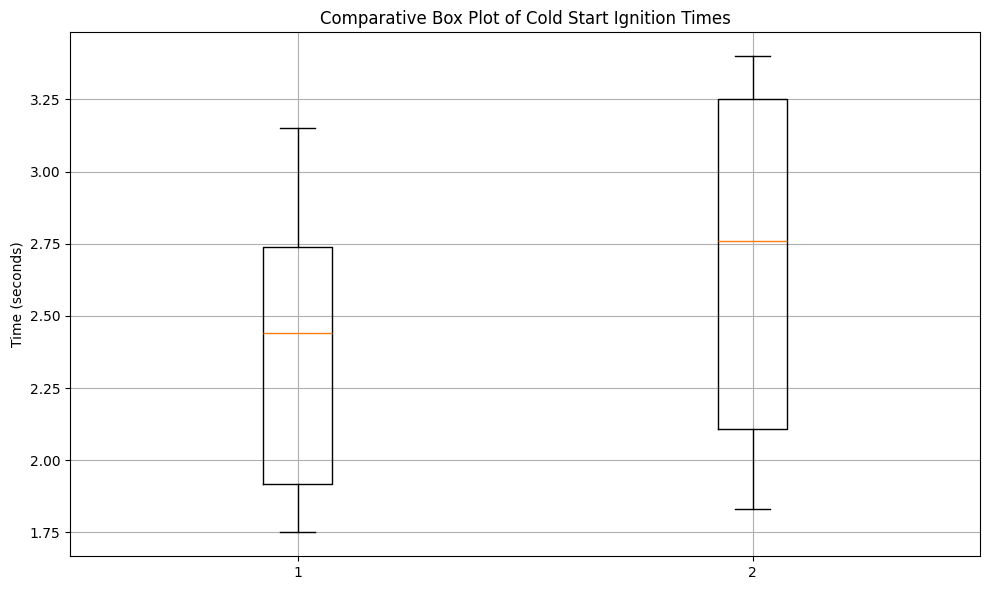

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

sample_a = np.array([1.75, 1.92, 2.62, 2.35, 3.09, 3.15, 2.53, 1.91])
sample_b = np.array([1.83, 1.99, 3.13, 3.29, 2.65, 2.87, 3.40, 2.46, 1.89, 3.35])

mean_a = np.mean(sample_a)
variance_a = np.var(sample_a, ddof=1)
std_dev_a = np.std(sample_a, ddof=1)

mean_b = np.mean(sample_b)
variance_b = np.var(sample_b, ddof=1)
std_dev_b = np.std(sample_b, ddof=1)

plt.figure(figsize=(10, 6))
plt.boxplot([sample_a, sample_b])
plt.title("Comparative Box Plot of Cold Start Ignition Times")
plt.ylabel("Time (seconds)")
plt.grid(True)
plt.tight_layout()
print(mean_a, variance_a, std_dev_a, mean_b, variance_b, std_dev_b)


Question-5

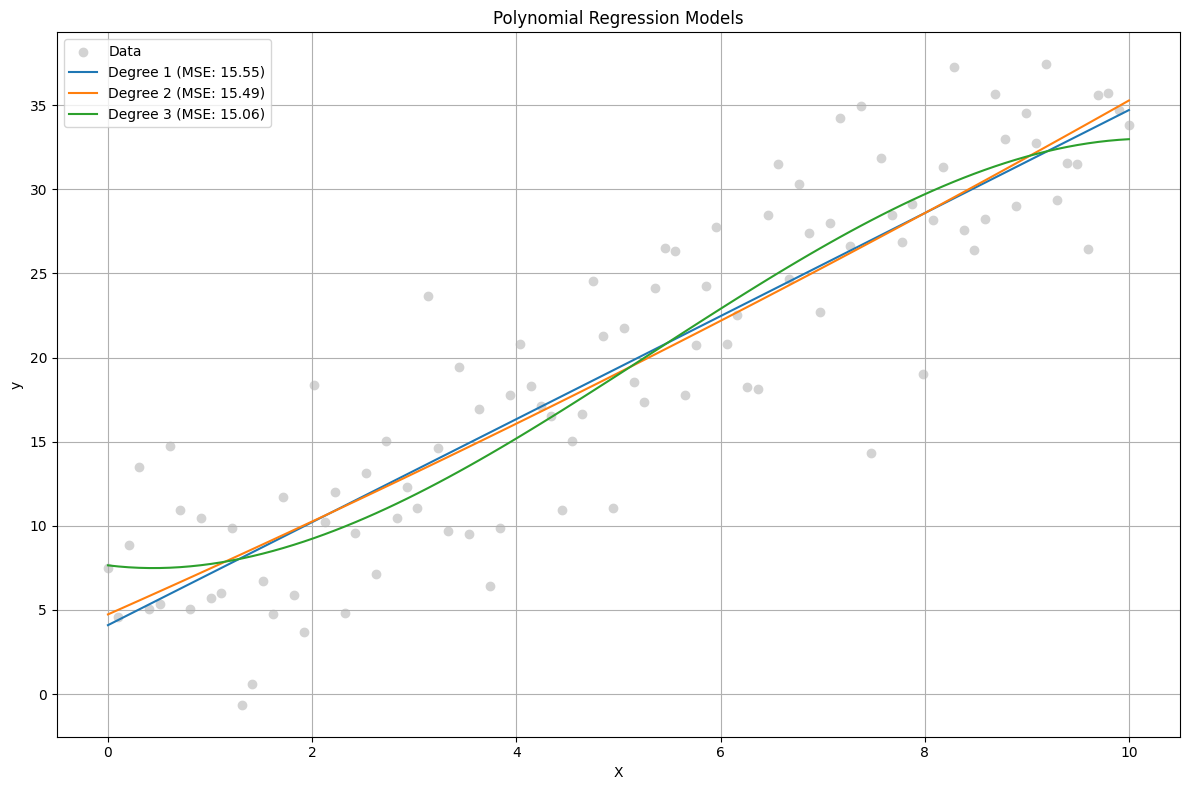

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(42)
X = np.linspace(0, 10, 100).reshape(-1, 1)
true_y = 3 * X.squeeze() + 5
noise = np.random.normal(0, 5, size=100)
y = true_y + noise


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


degrees = [1, 2, 3]
models = []
mses = []

plt.figure(figsize=(12, 8))
plt.scatter(X, y, color='lightgray', label='Data')

x_plot = np.linspace(0, 10, 100).reshape(-1, 1)

for degree in degrees:
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    x_plot_poly = poly.transform(x_plot)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    y_pred = model.predict(X_test_poly)
    mse = mean_squared_error(y_test, y_pred)

    mses.append(mse)
    models.append(model)

    y_plot = model.predict(x_plot_poly)
    plt.plot(x_plot, y_plot, label=f'Degree {degree} (MSE: {mse:.2f})')

plt.title("Polynomial Regression Models")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.tight_layout()